<a href="https://colab.research.google.com/github/Francisakinrinade/Darey.io-Projects/blob/main/Module_2_Capstone_project(_Building_an_XGBoost_Model_for_Airline_Passenger_Satisfaction_Prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building an XGBoost Model for Airline Passenger Satisfaction Prediction

## Overview
This project focuses on using machine learning techniques to predict airline passenger satisfaction. By leveraging the XGBoost algorithm, we aim to build a robust model that can accurately classify passengers as satisfied or dissatisfied based on various features such as flight distance, seat comfort, and service quality.

## Objective
Develop a machine learning model using XGBoost to predict passenger satisfaction. The project will cover the complete machine learning pipeline, including data preprocessing, feature engineering, model training, hyperparameter tuning, and evaluation.

## Learning Outcomes
1. Understand the importance of data preprocessing and feature engineering in machine learning.
2. Learn to implement and tune the XGBoost algorithm for classification tasks.
3. Gain experience in evaluating model performance using metrics such as accuracy, precision, recall, and F1 score.
4. Explore feature importance and interpret model results.
5. Compare the performance of XGBoost with other models like Decision Trees and Random Forests.

---

## Step 1: Define the Problem
### Task:
Understand the problem and its real-world implications. Predicting passenger satisfaction can help airlines improve customer experience, optimize services, and increase customer loyalty.

### Mini-task:
Write a brief paragraph on how predicting passenger satisfaction can benefit the airline industry?

Predicting passenger satisfaction can significantly benefit the airline industry by enabling companies to proactively address customer needs, enhance service quality, and improve overall travel experiences. By analyzing trends and feedback, airlines can tailor services such as in-flight amenities, seating arrangements, and customer support, leading to increased loyalty and repeat business. Moreover, anticipating dissatisfaction allows for timely interventions, reducing complaints and boosting brand reputation. Ultimately, predictive insights contribute to more efficient resource allocation, higher customer retention, and a competitive edge in a highly dynamic market.


## Step 2: Data Collection
### Task:
Collect a dataset suitable for predicting passenger satisfaction. The dataset used in this project is the `Invistico_Airline.csv`, which contains various features related to passenger experiences.

### Mini-task:
Load the dataset and inspect the first few rows to understand its structure.

#### Hint:
Use the `pandas` library to load the dataset and display the first 10 rows.

```python
import pandas as pd

# Load the dataset
airline_data = pd.read_csv('..\sample_data\Invistico_Airline.csv')

# Display the first 10 rows
### YOUR CODE HERE ###
```

---


In [ ]:
# Load the dataset

import requests
import pandas as pd
from io import StringIO
def read_gd(sharingurl):
    file_id = sharingurl.split('/')[-2]
    download_url='https://drive.google.com/uc?export=download&id=' + file_id
    url = requests.get(download_url).text
    csv_raw = StringIO(url)
    return csv_raw

url = "https://drive.google.com/file/d/1gG0NpYi2hUh8oaYJg7tIsb157D0Qgpzt/view?usp=sharing"
gdd = read_gd(url)

df = pd.read_csv(gdd)

df.head()


,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


In [ ]:
# Display the first 10 Rows
df.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0



## Step 3: Exploratory Data Analysis (EDA)
### Task:
Analyze the dataset to understand the distribution of features, identify missing values, and explore relationships between variables.

### Mini-task:
Visualize the distribution of the target variable (satisfaction) and inspect the data types of each column.

#### Hint:
Use `value_counts()` to check the distribution of the target variable and `dtypes` to inspect the data types.

```python
import matplotlib.pyplot as plt

# Visualize the distribution of the target variable
### YOUR CODE HERE ###

# Display data types
### YOUR CODE HERE ###
```

---


satisfaction
satisfied       71087
dissatisfied    58793
Name: count, dtype: int64


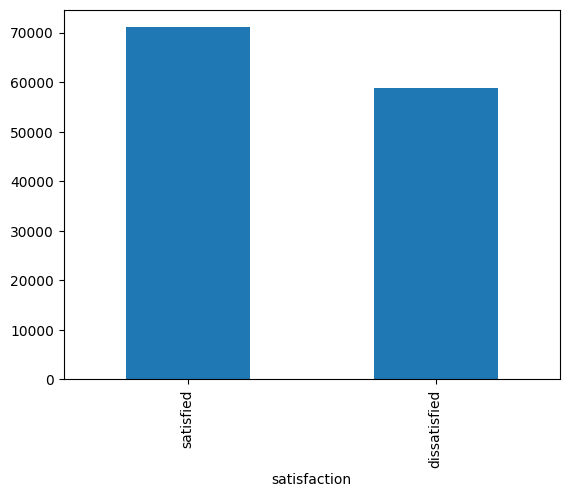

,0
satisfaction,object
Customer Type,object
Age,int64
Type of Travel,object
Class,object
Flight Distance,int64
Seat comfort,int64
Departure/Arrival time convenient,int64
Food and drink,int64
Gate location,int64


In [ ]:
import matplotlib.pyplot as plt

# Visualize the distribution of the target variable
print(df['satisfaction'].value_counts())

df['satisfaction'].value_counts().plot(kind='bar')
plt.show()

# Display data types
df.dtypes


In [ ]:
df.shape

(129880, 22)

In [ ]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print(f"Categorical variables: {categorical_cols}")

Categorical variables: Index(['satisfaction', 'Customer Type', 'Type of Travel', 'Class'], dtype='object')


In [ ]:
num_categorical_cols = len(categorical_cols)
print(f"Number of categorical variables: {num_categorical_cols}")

Number of categorical variables: 4



## Step 4: Data Preprocessing
### Task:
Preprocess the data to prepare it for modeling. This includes handling missing values, encoding categorical variables, and splitting the data into training and testing sets.

### Mini-task:
Convert categorical variables into numerical format using one-hot encoding and split the data into training and testing sets.

#### Hint:
Use `pd.get_dummies()` to encode categorical variables and `train_test_split()` to split the data.

```python
from sklearn.model_selection import train_test_split

# Convert categorical variables to numerical using one-hot encoding
### YOUR CODE HERE ###

# Define the target variable and features
### YOUR CODE HERE ###

# Split the data into training and testing sets
### YOUR CODE HERE ###
```

---


In [ ]:
from sklearn.model_selection import train_test_split

# Convert categorical variables to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['satisfaction', 'Customer Type', 'Type of Travel', 'Class'], drop_first=True)

# Define the target variable and features
X = df_encoded.drop('satisfaction_satisfied', axis=1)
y = df_encoded['satisfaction_satisfied']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Step 5: Model Training Using XGBoost
### Task:
Train an XGBoost model on the preprocessed data. Perform hyperparameter tuning using GridSearchCV to find the optimal parameters.

### Mini-task:
Define the XGBoost classifier and perform hyperparameter tuning.

#### Hint:
Use `XGBClassifier()` and `GridSearchCV()` to tune hyperparameters like `max_depth`, `learning_rate`, and `n_estimators`.

```python
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the XGBoost classifier
### YOUR CODE HERE ###

# Define the parameters for hyperparameter tuning
### YOUR CODE HERE ###

# Perform GridSearchCV
### YOUR CODE HERE ###

# Display the best parameters
### YOUR CODE HERE ###
```

---

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the XGBoost classifier
xgb_model = XGBClassifier(random_state=42)

# Define the parameters for hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200, 300]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

# Display the best parameters
print(f"Best parameters: {grid_search.best_params_}")

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.9s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.8s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   2.7s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   1.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   1.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   1.3s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   1.9s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   1.8s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   1.9s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   3.0s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   1.0s
[CV] END ..learning_rate=0.01, max_depth=5, n_es


## Step 6: Model Evaluation
### Task:
Evaluate the model's performance using metrics such as accuracy, precision, recall, and F1 score. Visualize the results using a confusion matrix and feature importance plot.

### Mini-task:
Evaluate the model on the test set and visualize the confusion matrix and feature importance.

#### Hint:
Use `accuracy_score()`, `precision_score()`, `recall_score()`, and `f1_score()` to evaluate the model. Use `confusion_matrix()` and `plot_importance()` for visualization.

```python
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Predict on the test set
### YOUR CODE HERE ###

# Calculate evaluation metrics
### YOUR CODE HERE ###

# Plot the confusion matrix
### YOUR CODE HERE ###

# Plot feature importance
### YOUR CODE HERE ###
```

---

Accuracy: 0.9584616569140745
Precision: 0.9708689458689459
Recall: 0.953150129361583
F1 Score: 0.9619279489079425


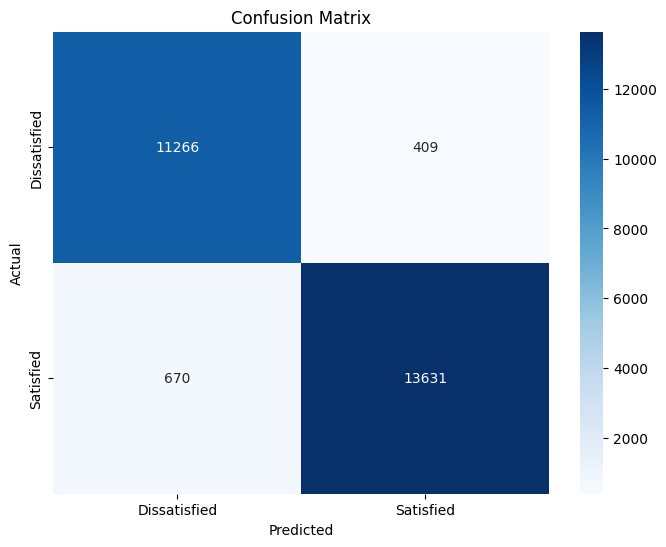

<Figure size 1000x600 with 0 Axes>

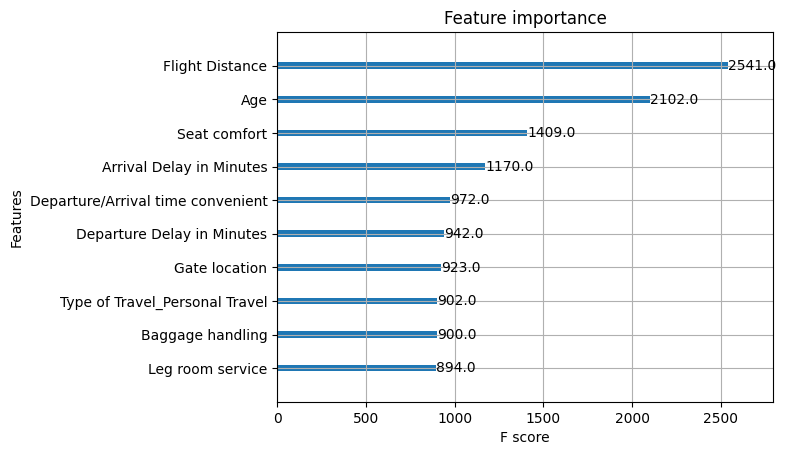

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

# Predict on the test set
y_pred = grid_search.best_estimator_.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Dissatisfied', 'Satisfied'],
            yticklabels=['Dissatisfied', 'Satisfied'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot feature importance
xgb_best = grid_search.best_estimator_
plt.figure(figsize=(10,6))
xgb_best.get_booster().feature_names = list(X.columns)
xgb.plot_importance(xgb_best, max_num_features=10)
plt.show()



## Step 7: Model Comparison (Optional)
### Task:
Compare the performance of the XGBoost model with other models like Decision Trees and Random Forests.

### Mini-task:
Train a Decision Tree and Random Forest model, and compare their performance with the XGBoost model.

#### Hint:
Use `DecisionTreeClassifier()` and `RandomForestClassifier()` to train the models and compare their accuracy.

```python
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Train a Decision Tree model
### YOUR CODE HERE ###

# Train a Random Forest model
### YOUR CODE HERE ###

# Compare model performance
### YOUR CODE HERE ###
```

---

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Train a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)

# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

# Compare model performance
print(f"Decision Tree Accuracy: {dt_accuracy}")
print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"XGBoost Accuracy: {accuracy}")

Decision Tree Accuracy: 0.9335540498922081
Random Forest Accuracy: 0.9568832768709578
XGBoost Accuracy: 0.9584616569140745


## Considerations
**What are some key takeaways you learned from this project?**
- Reflect on the importance of hyperparameter tuning and feature engineering.
Hyperparameter tuning and feature engineering are critical components of building high-performance machine learning models.

Hyperparameter Tuning: Hyperparameters are configuration settings used to control the learning process (e.g., learning rate, depth of decision trees, number of estimators in XGBoost). Unlike model parameters, they are not learned from data and must be set before training. Effective tuning helps optimize model performance by reducing overfitting, improving generalization, and ensuring convergence. Techniques such as grid search, random search, and Bayesian optimization are commonly used for this purpose.

Feature Engineering: This involves creating, selecting, and transforming variables to improve model accuracy. It is often more impactful than the choice of algorithm itself. Quality features can help the model uncover deeper patterns and relationships in the data, ultimately leading to better predictions. Techniques include encoding categorical variables, scaling, dimensionality reduction, and creating interaction terms.

In essence, a well-tuned model with thoughtfully engineered features often significantly outperforms a poorly configured one, even if both use the same algorithm.

- Consider how the model's insights can be applied to improve airline services.

key factors and considerations that influence passenger satisfaction according to the model which can be applied to improve airline services includes:

**1. Feature Prioritization:** By spotlighting high-impact factors like seat comfort or booking ease, airlines can invest in areas that drive the greatest satisfaction.

**2. Customer Segmentation:** Understanding different customer groups (e.g., business vs. economy travelers) allows for tailored services and communication.

**3. Personalized Services:** Use passenger history to offer customized options, such as preferred meals or seating, during the booking process.

**4. Enhancing Operational Efficiency and Resource Allocation by:** By leveraging insights into delay patterns for optimized flight scheduling and crew deployment while strategically allocating resources to high-impact areas valued by passengers—such as enhanced in-flight Wi-Fi and targeted staff training—airlines can significantly improve timeliness, service quality, and overall operational efficiency.

**5. Real-Time Monitoring:** Integrate the model with operational systems to track satisfaction trends and detect issues early thereby improving service delivery.

**6. Integration of Customer requirement into business process:** model outputs can be used to guide pricing, marketing, and service development for stronger business outcomes. By leveraging predictive modeling, airlines can make data-driven decisions that enhance the travel experience, improve satisfaction, and foster long-term loyalty—turning insights into a clear competitive advantage.

**How would you share your findings with a team?**
 - Prepare a presentation with visualizations and key metrics.

**Presentation of Project Findings to Team**

**Slide 1: Title Slide**

Leveraging the XGBoost algorithm to build a robust model that can accurately classify passengers as satisfied or dissatisfied based on various features such as flight distance, seat comfort, and service quality.

**Slide 2: Project Introduction & Overview**

**Key Points:**

  **- The Importance of Passenger Satisfaction:** Passenger satisfaction is not just a feel-good metric; it's a crucial driver of airline profitability and long-term success. Satisfied passengers are more likely to become loyal customers, recommend the airline to others, and contribute to positive brand reputation. In the highly competitive airline industry, understanding and exceeding passenger expectations is paramount.

  **- The Power of Predictive Analytics:** This project harnesses the power of machine learning to proactively address passenger satisfaction. By building a predictive model, we can identify key factors that influence passenger experiences and anticipate potential issues before they arise. This allows airlines to make data-driven decisions to enhance their services and improve customer satisfaction.

  **- Project Focus and Approach:** This project focuses on developing a robust passenger satisfaction prediction model using the XGBoost algorithm. XGBoost is a powerful machine learning technique known for its accuracy and efficiency in classification tasks. We will leverage a comprehensive dataset of passenger experiences, including factors like flight distance, seat comfort, in-flight entertainment, and service quality, to train and evaluate our model.

**Slide 3: Project Goals:**

  - **Passenger Satisfaction Classification:** Accurately classify passengers as satisfied or dissatisfied based on their experiences.
  - **Identifying Key Drivers of Passenger Satisfaction:** Uncover the most influential factors that impact passenger satisfaction.
  - **Generate Actionable Insights:** Provide data-driven recommendations for airlines to improve their services and enhance customer experiences.

**Slide 4: Project Methodology**

 The project covers the complete machine learning pipeline, including data preprocessing, feature engineering, model training, and hyperparameter tuning.

   - review of the XGBoost algorithm and its benefits for classification tasks
   - review of data preprocessing, feature engineering, and model training process
   - Highlight implication of hyperparameter tuning using output of model accuracy, precision, recall, and F1 score on the test set for best parameters

**Slide 5: Model Evaluation and Comparison with Decision Tree and Random Forest**
   
The accuracies of this project (XGBoost) model was compared with Decision Tree and Random Forest which are two other popular machine learning models and the results are:

- Decision Tree Accuracy: 0.9335540498922081
- Random Forest Accuracy: 0.9568832768709578
- XGBoost Accuracy: 0.9584616569140745

The accuracy score of the models from the dataset under review suggests that the effectiveness of each of the models in predicting customer satisfaction in the airline context are:

**- Decision Tree  93.36%**
**- Random Forest  95.69%**
**- XGBoost        95.85%**

From a direct comparison of their performance, XGBoost offers the highest prediction accuracy, making it the most suitable choice when performance is critical—particularly in customer satisfaction modeling within the airline context where small improvements can significantly enhance decision-making.

Random Forest remains a reliable and interpretable alternative with strong accuracy.

Decision Tree, while useful for quick insights or simpler problems, may not be ideal for high-stakes prediction tasks due to its relatively lower accuracy.

Key metrics used in this project include: Accuracy score, Precision score, Recall score, F1 score. These are not always the only factor to consider when choosing a model. Other factors like interpretability, training time, and robustness might also be important depending on the specific needs of a project and dataset.  

- Discuss the impact of different features on passenger satisfaction.

The xgb.plot_importance() function is used to generate a visual representation of feature importance as determined by the XGBoost model. Although it doesn't display the exact numerical values of the scores, the plot clearly ranks features based on how much they contribute to the model’s predictive performance.

**Feature Importance Interpretation:**

**-Higher Scores Indicate Greater Importance:** Features with longer bars in the plot have higher importance scores, indicating that they contribute more significantly to the model's ability to predict passenger satisfaction.

**-Relative Impact:** The lengths of the bars represent the relative importance of features compared to each other. For example, if "Online boarding" has a much longer bar than "Leg room service", it implies that "Online boarding" is a more impactful factor in passenger satisfaction according to the model.

**Key Factors Influencing Customer Satisfaction Based on XGBoost Feature Importance**

According to the results from the xgb.plot_importance() function, the following features play a significant role in shaping airline customer satisfaction:

**1. Online Boarding**
 - **High Positive Impact**
The ease and convenience of online boarding significantly enhance the passenger experience, reducing wait times and simplifying the travel process.

**2. Inflight Wi-Fi Service**
 - **High Positive Impact**
Passengers highly value reliable Wi-Fi access during flights, especially on long journeys or for business travelers needing connectivity.

**3. Type of Travel – Personal Travel**
 - **Moderate Negative Impact**
Personal travelers may have different expectations than business passengers, often placing higher value on comfort and leisure-related services. Lower satisfaction may stem from unmet expectations.

**4. Baggage Handling**
 - **Moderate Positive Impact**
Efficient and reliable baggage handling contributes to a smoother travel experience and helps build trust in the airline.

**5. Seat Comfort**
 - **Moderate Positive Impact**
Comfortable seating directly influences physical well-being and overall satisfaction, particularly on long-haul flights.

**6. Inflight Entertainment**
 - **Moderate Positive Impact**
A diverse and engaging selection of entertainment options enhances the onboard experience, keeping passengers occupied and content.

**7. Check-in Service**
 - **Moderate Positive Impact**
Streamlined and efficient check-in processes reduce stress and set a positive tone for the rest of the journey.

**8. Cleanliness**
 - **Moderate Positive Impact**
Clean cabins, restrooms, and seats are fundamental to customer expectations and contribute to perceived airline quality and care.

**9. Customer Type – Loyal Customer**
 - **Potential Positive Impact**
Loyal customers may report higher satisfaction due to familiarity with the airline’s services and perceived value from loyalty programs.

**10. Flight Distance**
 - **Variable Impact**
Flight length can affect satisfaction in both directions—longer flights offer more service opportunities but also more chances for discomfort or delays, while shorter flights may lack certain amenities.

**Important Considerations:**

Correlation vs. Causation: Feature importance scores represent the correlation between features and satisfaction, not necessarily causation.
Data Dependencies: The specific features and their importance are highly dependent on the dataset used to train the model. Different datasets may yield different results.
Business Context: It's crucial to interpret these deductions within the broader business context of the airline industry to make informed decisions.

**What would you share with and recommend to stakeholders?**
- Highlight the key features that contribute most to passenger satisfaction.

Based on the XGBoost model’s feature importance analysis, the following key factors drive passenger satisfaction. Understanding and acting on these can help airlines refine services, improve loyalty, and gain a competitive edge.

 **1. Online boarding:** Likely the most important factor, suggesting passengers highly value the convenience and efficiency of online check-in.

 **2. Inflight wifi service:** A crucial feature for modern travelers, indicating that access to Wi-Fi during flights significantly impacts satisfaction.

 **3. Type of Travel_Personal Travel:** This feature might have a negative impact, implying that personal travelers could have different expectations or experience lower satisfaction compared to business travelers.

 **4. Baggage handling:** An important aspect of air travel, with efficient and reliable baggage handling contributing to a positive passenger experience.

 **5. Seat comfort:** A core element of passenger comfort, especially during longer flights, highlighting the importance of comfortable seating.

 **6. Inflight entertainment:** A significant factor for passenger engagement and satisfaction during the flight, especially on long-haul journeys.

 **7. Checkin service:** A smooth and efficient check-in process sets a positive tone for the entire travel experience.

 **8. Cleanliness:** A basic expectation for passengers, with a clean aircraft and facilities contributing to overall satisfaction.

 **9. Customer Type_Loyal Customer:** Loyal customers might generally have higher satisfaction levels, indicating the importance of loyalty programs and customer retention efforts.

 **10. Flight Distance:** This feature could have variable impact, with longer flights potentially offering more opportunities for both positive and negative experiences.

- Recommend strategies to improve services based on the model's insights.

**Strategic Recommendations to stakeholders**

The key is to focus on the features that have the strongest influence on passenger satisfaction, as identified by the XGBoost model. Here are some recommendations:

**1. Enhance Online Boarding Experience:**

Optimize the online check-in process to make it even more user-friendly and efficient. This could involve simplifying the steps, providing clear instructions, and offering multiple language options.
Expand self-service options, such as allowing passengers to select seats, add baggage, and print boarding passes online without any hassle.
Invest in mobile check-in capabilities to provide passengers with greater flexibility and convenience.
Consider offering incentives for using online check-in, such as priority boarding or discounts on ancillary services.

**2. Improve Inflight Wi-Fi Service:**

Offer high-speed, reliable Wi-Fi connectivity on all flights. This is a crucial feature for modern travelers, and providing a seamless online experience can significantly boost satisfaction.
Explore partnerships with telecommunication providers to expand coverage and improve bandwidth.
Consider offering tiered pricing options for Wi-Fi access to cater to different passenger needs and budgets.
Promote the availability of inflight Wi-Fi through marketing materials and onboard announcements.

**3. Cater to Personal Travelers:**

Understand the specific needs and expectations of personal travelers. Conduct surveys or focus groups to gather insights into their preferences.
Offer personalized services and amenities that cater to their needs, such as family-friendly seating options, entertainment packages, or discounts on travel insurance.
Consider creating targeted marketing campaigns to attract and retain personal travelers.

**4. Ensure Efficient Baggage Handling:**

Invest in technology and processes to streamline baggage handling operations and minimize delays or errors.
Provide clear and timely communication to passengers regarding their baggage status throughout their journey.
Offer baggage tracking services to provide passengers with peace of mind and real-time updates on their luggage location.
Implement robust baggage claim procedures to reduce waiting times and ensure smooth retrieval of luggage.

**5. Prioritize Seat Comfort:**

Invest in ergonomic and comfortable seating for all cabin classes. This could involve offering adjustable headrests, lumbar support, and wider seats.
Provide adequate legroom to ensure passenger comfort, especially on long-haul flights.
Offer seat upgrades or premium seating options for passengers seeking extra comfort.

**6. Enhance Inflight Entertainment:**

Offer a wide variety of entertainment options to cater to diverse passenger preferences. This could include movies, TV shows, music, games, and audiobooks.
Invest in state-of-the-art entertainment systems with high-quality screens and audio.
Provide personal device entertainment options by allowing passengers to stream content to their own devices.
Regularly update the entertainment library with new releases and popular content.

**7. Streamline Check-in Service:**

Ensure sufficient staffing levels at check-in counters to minimize wait times.
Implement self-service check-in kiosks to expedite the process.
Provide clear signage and directions to guide passengers through the check-in area.
Offer priority check-in for loyal customers or passengers with special needs.

**8. Maintain High Standards of Cleanliness:**

Implement rigorous cleaning protocols for aircraft and airport facilities.
Provide hand sanitizer and disinfectant wipes for passengers to use.
Train staff on proper hygiene practices to ensure a clean and safe environment for passengers.
Regularly inspect and maintain aircraft interiors to ensure cleanliness and functionality.

**9. Cultivate Customer Loyalty:**

Offer attractive loyalty programs with valuable rewards and benefits to encourage repeat business.
Personalize communication with loyal customers to show appreciation and offer tailored services.
Provide exclusive perks and privileges to loyal customers, such as priority boarding, lounge access, or bonus miles.

**10. Address Flight Distance Considerations:**

Offer amenities and services tailored to the length of the flight. For example, provide more frequent meal and beverage services on longer flights.
Consider offering comfort kits with essentials like eye masks, earplugs, and blankets for long-haul flights.
Provide opportunities for passengers to stretch and move around during long flights to reduce discomfort.

**Conclusion**

In conclusion, applying the XGBoost machine learning model to measure and interpret key drivers of passenger satisfaction empowers airlines to make data-driven decisions that enhance service delivery. By continuously monitoring feedback across multiple channels and refining strategies through predictive insights, airlines can proactively address pain points and personalize experiences. Coupled with empowering frontline staff to uphold service excellence, these efforts foster a customer-centric culture that boosts satisfaction, strengthens loyalty, and ensures sustained success in a competitive aviation landscape.